# ECE471 Fall 2022 MP1 Checkpoint 1
Dante Howard (danteah2) \\
Guifu Liu (guiful2) \\
Sean Lee (sl84)

# Setup
Fetch and import dataset collected from Carla client, as well as libraries used. 

In [ ]:
!git clone https://github.com/seanseungbeomlee/ECE_471_MP1_AV_Analysis

Cloning into 'ECE_471_MP1_AV_Analysis'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 173 (delta 37), reused 73 (delta 27), pack-reused 80
Receiving objects: 100% (173/173), 1.89 MiB | 20.14 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy
import os

In [ ]:
os.chdir('/content/ECE_471_MP1_AV_Analysis')
clear_night_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_ctl.csv')
clear_night_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_cvip.csv')
clear_night_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0911_024337-data_fi_ghost_cutin-single_traj.csv')

clear_sunset_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_ctl.csv')
clear_sunset_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_cvip.csv')
clear_sunset_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0911_023451-data_fi_ghost_cutin-single_traj.csv')

clear_noon_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_ctl.csv')
clear_noon_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_cvip.csv')
clear_noon_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023016-data_fi_ghost_cutin-single_traj.csv')

rain_noon_ctl = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_ctl.csv')
rain_noon_cvip = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_cvip.csv')
rain_noon_traj = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0911_023309-data_fi_ghost_cutin-single_traj.csv')

# Task 1
## Task 1.1. List the first 5 rows of the csv firles for the clear-night weather condition

In [ ]:
clear_night_ctl.head()

,ts,agent_id,throttle,steer,brake
0,15547837,0,0.9,-0.001013,0.0
1,15547838,0,0.9,-0.010019,0.0
2,15547839,0,0.9,-0.006061,0.0
3,15547840,0,0.9,-0.007578,0.0
4,15547841,0,0.9,-0.001617,0.0


In [ ]:
clear_night_cvip.head()

,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z
0,15547837,0,500.491189,198.767441,-95.832657,-499.819366
1,15547838,0,5.595580,195.567444,-90.832657,0.100000
2,15547839,0,5.592365,195.567444,-90.832657,0.095407
3,15547840,0,5.589578,195.567444,-90.832657,0.084691
4,15547841,0,5.587154,195.567444,-90.832657,0.069311


In [ ]:
clear_night_traj.head()

,ts,agent_id,x,y,z,v
0,15547837,0,192.362411,-86.26268,0.539326,0.0
1,15547838,0,192.362411,-86.26268,0.491906,0.0
2,15547839,0,192.362411,-86.26268,0.438374,0.0
3,15547840,0,192.362411,-86.26268,0.378732,0.0
4,15547841,0,192.362411,-86.26268,0.312981,0.0


## Task 1.2. Summarizing information for each weather condition

### Durations

In [ ]:
def get_duration(ctl):
  times = ctl['ts']
  return times.iloc[-1] - times.iloc[0]

clear_night_duration = get_duration(clear_night_ctl)
clear_sunset_duration = get_duration(clear_sunset_ctl)
clear_noon_duration = get_duration(clear_noon_ctl)
rain_noon_duration = get_duration(rain_noon_ctl)

duration_df = pd.DataFrame()
duration_df.loc['Clear night', 'Duration'] = clear_night_duration
duration_df.loc['Clear sunset', 'Duration'] = clear_sunset_duration
duration_df.loc['Clear noon', 'Duration'] = clear_noon_duration
duration_df.loc['Rain noon', 'Duration'] = rain_noon_duration
# print('clear-night: %f, clear-sunset: %f, clear-noon: %f, rain-noon: %f' % (clear_night_duration, clear_sunset_duration, clear_noon_duration, rain_noon_duration))
duration_df

,Duration
Clear night,926.0
Clear sunset,757.0
Clear noon,751.0
Rain noon,404.0


### Mean and Standard Deviations

In [ ]:
summary_df = pd.DataFrame()

# Helper function to get the information for each condition's dataframe
def add_summary(ctl, cvip, traj, df_name):

  # Getting values from ctl dataframe
  ctl_means = ctl.mean(axis=0)
  ctl_stds = ctl.std(axis=0)
  summary_df.loc['throttle', df_name + ' mean'] = ctl_means['throttle']
  summary_df.loc['throttle', df_name + ' std'] = ctl_stds['throttle']
  summary_df.loc['steer', df_name + ' mean'] = ctl_means['steer']
  summary_df.loc['steer', df_name + ' std'] = ctl_stds['steer']
  summary_df.loc['brake', df_name + ' mean'] = ctl_means['brake']
  summary_df.loc['brake', df_name + ' std'] = ctl_stds['brake']

  # Getting values from cvip dataframe
  summary_df.loc['cvip', df_name + ' mean'] = cvip.mean()['cvip']
  summary_df.loc['cvip', df_name + ' std'] = cvip.mean()['cvip']

  # Getting values from traj dataframe
  traj_means = traj.mean(axis=0)
  traj_stds = traj.std(axis=0)
  summary_df.loc['x', df_name + ' mean'] = traj_means['x']
  summary_df.loc['x', df_name + ' std'] = traj_stds['x']
  summary_df.loc['y', df_name + ' mean'] = traj_means['y']
  summary_df.loc['y', df_name + ' std'] = traj_stds['y']
  summary_df.loc['v', df_name + ' mean'] = traj_means['v']
  summary_df.loc['v', df_name + ' std'] = traj_stds['v']

add_summary(clear_night_ctl, clear_night_cvip, clear_night_traj, 'clear-night')
add_summary(clear_sunset_ctl, clear_sunset_cvip, clear_sunset_traj, 'clear-sunset')
add_summary(clear_noon_ctl, clear_noon_cvip, clear_noon_traj, 'clear-noon')
add_summary(rain_noon_ctl, rain_noon_cvip, rain_noon_traj, 'rain-noon')

summary_df = summary_df.round(3)
summary_df


,clear-night mean,clear-night std,clear-sunset mean,clear-sunset std,clear-noon mean,clear-noon std,rain-noon mean,rain-noon std
throttle,0.616,0.341,0.610,0.282,0.608,0.283,0.637,0.275
steer,0.003,0.066,0.000,0.006,0.001,0.006,-0.001,0.003
brake,0.122,0.327,0.057,0.231,0.059,0.235,0.047,0.212
cvip,39.506,39.506,20.107,20.107,19.409,19.409,7.095,7.095
x,189.727,2.851,192.940,0.398,192.916,0.403,192.646,0.269
y,-25.546,40.433,-31.128,40.475,-31.366,40.570,-63.407,21.537
v,5.668,2.588,6.884,3.307,6.936,3.279,6.390,3.882


## Task 1.3 Visualize campaign results

In [ ]:
import seaborn as sns
sns.set_theme()

def plot_feature(feature, ctl=False, cvip=False, traj=False, histogram=False, scatter=False):

  # Getting y feature and ts values from the dataframes
  clear_night_ts = clear_night_ctl['ts']
  clear_sunset_ts = clear_sunset_ctl['ts']
  clear_noon_ts = clear_noon_ctl['ts']
  rain_noon_ts = rain_noon_ctl['ts']

  if ctl:
    clear_night_y = clear_night_ctl[feature]
    clear_sunset_y = clear_sunset_ctl[feature]
    clear_noon_y = clear_noon_ctl[feature]
    rain_noon_y = rain_noon_ctl[feature]

  elif cvip:

    clear_night_y = clear_night_cvip[feature]
    clear_sunset_y = clear_sunset_cvip[feature]
    clear_noon_y = clear_noon_cvip[feature]
    rain_noon_y = rain_noon_cvip[feature]
  
  else:

    clear_night_y = clear_night_traj[feature]
    clear_sunset_y = clear_sunset_traj[feature]
    clear_noon_y = clear_noon_traj[feature]
    rain_noon_y = rain_noon_traj[feature]


  # Setting the timestamp data to start at 0
  clear_night_ts = clear_night_ts - clear_night_ts[0]
  clear_sunset_ts = clear_sunset_ts - clear_sunset_ts[0]
  clear_noon_ts = clear_noon_ts - clear_noon_ts[0]
  rain_noon_ts = rain_noon_ts - rain_noon_ts[0]

  if histogram:

    plt.hist(clear_night_ts, clear_night_y)
    plt.hist(clear_sunset_ts, clear_sunset_y)
    plt.hist(clear_noon_ts, clear_noon_y)
    plt.hist(rain_noon_ts, rain_noon_y)

  elif scatter:

    plt.scatter(clear_night_ts, clear_night_y)
    plt.scatter(clear_sunset_ts, clear_sunset_y)
    plt.scatter(clear_noon_ts, clear_noon_y)
    plt.scatter(rain_noon_ts, rain_noon_y)

  else:

    plt.plot(clear_night_ts, clear_night_y, label='clear-night')
    plt.plot(clear_sunset_ts, clear_sunset_y, label='clear-sunset')
    plt.plot(clear_noon_ts, clear_noon_y, label='clear-noon')
    plt.plot(rain_noon_ts, rain_noon_y, label='rain-noon')

  plt.xlabel('Timestamp')
  plt.ylabel(feature)
  plt.title(feature + ' of car for various weather conditions')
  plt.legend()
  plt.show()

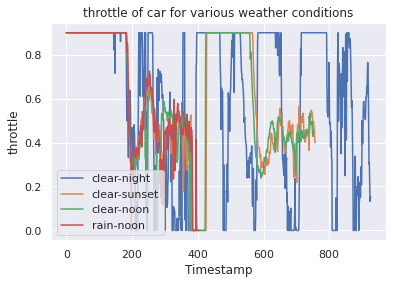

In [ ]:
plot_feature('throttle', ctl=True)

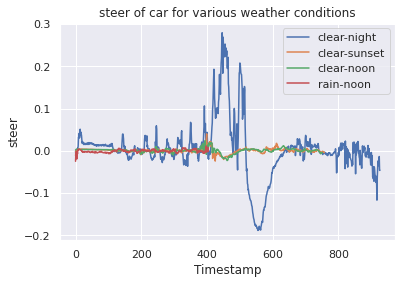

In [ ]:
plot_feature('steer', ctl=True)

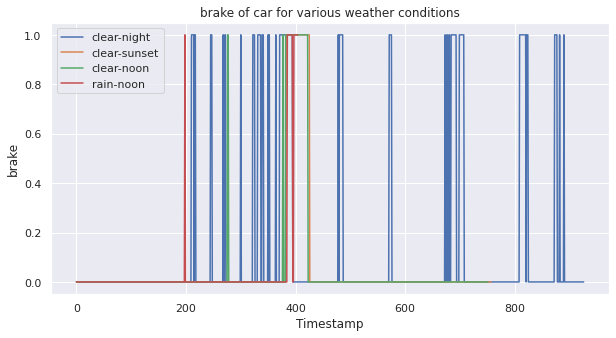

In [ ]:
plot_feature('brake', ctl=True)

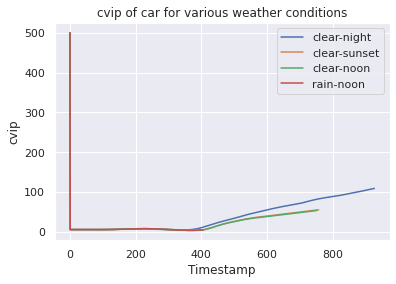

In [ ]:
plot_feature('cvip', cvip=True)

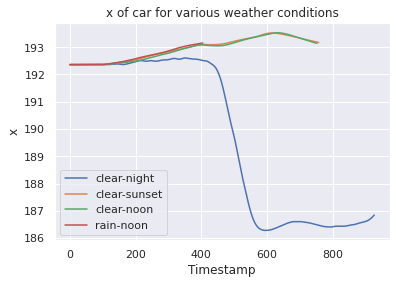

In [ ]:
plot_feature('x', traj=True)

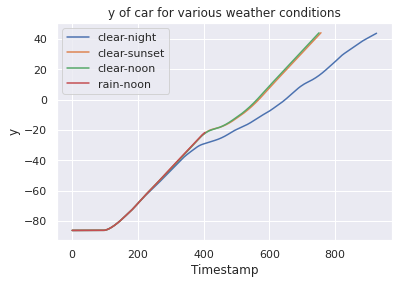

In [ ]:
plot_feature('y', traj=True)

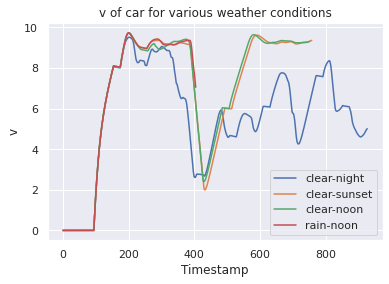

In [ ]:
plot_feature('v', traj=True)

## Task 1.4. Which features will change during an accident?

Based on my intuition, when an accident occurs there is initially a sudden push on the breaks and a sharp decrease in speed as the driver makes an attempt to not have a collision. There could also be erratic movement of the steering wheel from side to side as the car tries to avade the accident.

From the visualization of the data it seems that an accident occurs during the rain-noon weather condition as there are two sudden pressings of the break and a decrease in speed. One of the brake pressing takes much more time than those in clear sunset or clear noon. The data also stops before the other weather conditions such that the car was in an accident and stopped collecting data.

It also looks like an accident, or a near miss occurs in the clear-night weather conditon do to the erratic steering data. It seems as if the AV started swerving back and forth to avoid an accident.

# Task 2
## Task 2.1 Probability of an accident

From the 5 simulated scenarios only 1 resulted in an accident. Therefore the marginal probability of an accident ocurring is 0.2.

## Task 2.2 Weather condition for accidents

From the completion records the accident happened during the rain-noon weather condition. This was what we predicted from the simulation data. It makes sense that the accident occurs during the weather event of rain as it lowers visibility. While we would expect noon to have the most visibility time wise, since it was the only rain simulation in the data it seems the weather has a larger effect than time.

## Task 2.3 Abnormal AV behavior

Density Plot

In [ ]:
abnormal = 0
normal = 0
# Helper function for creating the density plot of a certain feature
def get_density_plot(feature, ctl=False, cvip=False, traj=False):

  if ctl:
    clear_night_y = clear_night_ctl[feature]
    clear_sunset_y = clear_sunset_ctl[feature]
    clear_noon_y = clear_noon_ctl[feature]
    rain_noon_y = rain_noon_ctl[feature]
  elif cvip:
    clear_night_y = clear_night_cvip[feature]
    clear_sunset_y = clear_sunset_cvip[feature]
    clear_noon_y = clear_noon_cvip[feature]
    rain_noon_y = rain_noon_cvip[feature]
  else:
    clear_night_y = clear_night_traj[feature]
    clear_sunset_y = clear_sunset_traj[feature]
    clear_noon_y = clear_noon_traj[feature]
    rain_noon_y = rain_noon_traj[feature]

  abnormal = clear_night_y + rain_noon_y
  normal = clear_noon_y + clear_sunset_y

  sns.set(rc = {'figure.figsize': (10,5)})
  sns.kdeplot(abnormal, label='abnormal', fill=True)
  sns.kdeplot(normal, label='normal', fill=True)

  plt.xlabel(feature)
  plt.ylabel('Density')
  plt.title(feature)
  plt.legend()

  
  plt.show()

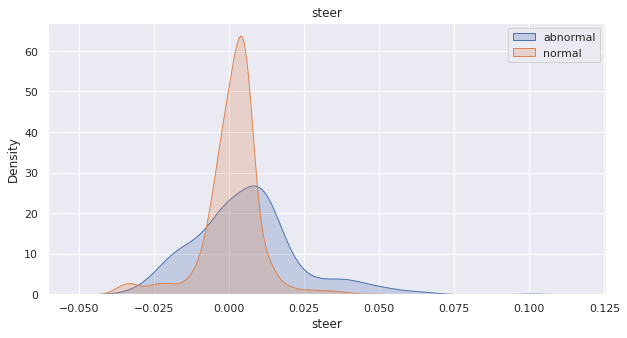

In [ ]:
get_density_plot('steer', ctl=True)

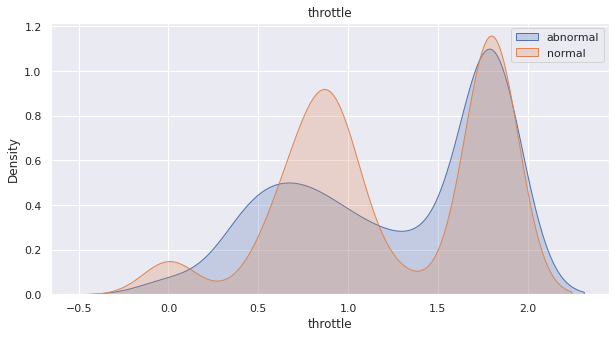

In [ ]:
get_density_plot('throttle', ctl=True)

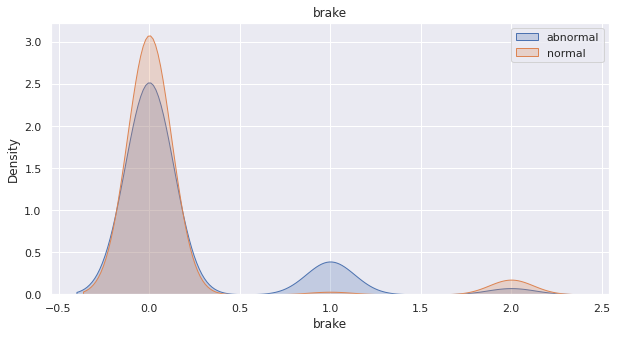

In [ ]:
get_density_plot('brake', ctl=True)

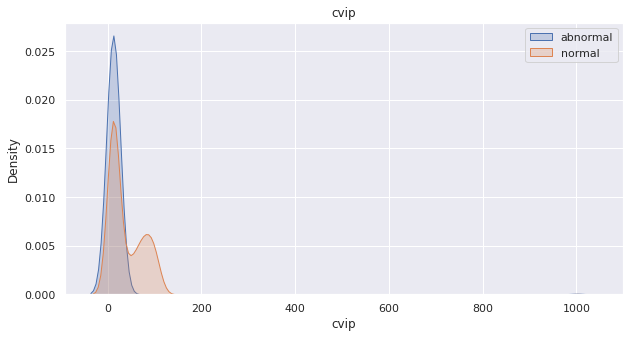

In [ ]:
get_density_plot('cvip', cvip=True)

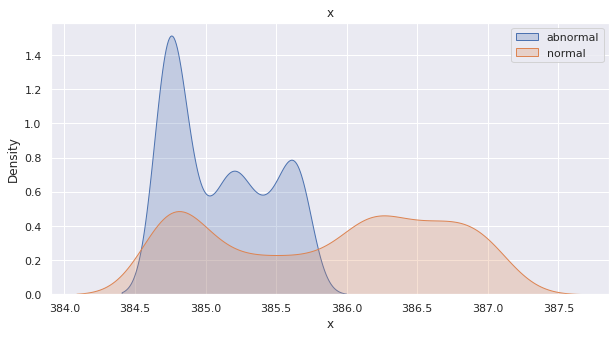

In [ ]:
get_density_plot('x', traj=True)

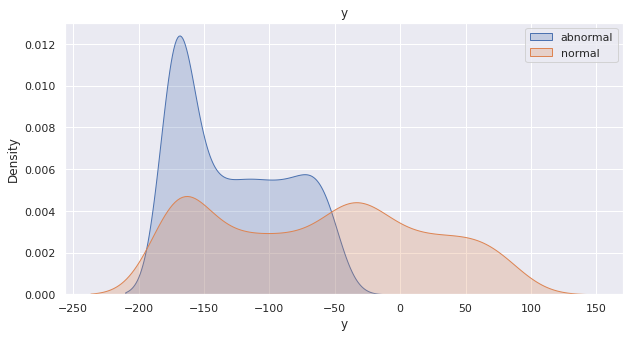

In [ ]:
get_density_plot('y', traj=True)

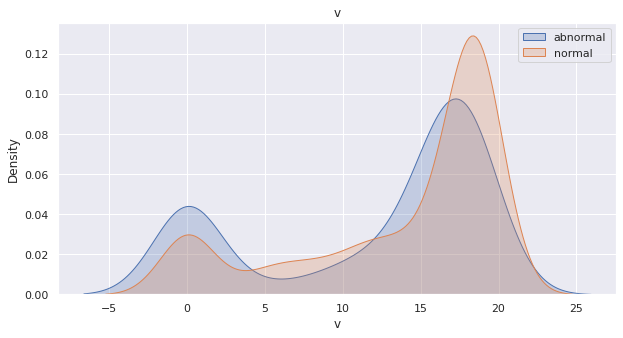

In [ ]:
get_density_plot('v', traj=True)


$H_0: \mu_a = \mu_n$ \\

$H_a: \mu \neq \mu_n$ \\


where $\sigma_a$ is the standard deviation of steer values in abnormal runs
and $\sigma_n$ is the standard deviation of steer values in normal runs


In [ ]:
abnormal = pd.concat([clear_night_ctl.steer, rain_noon_ctl.steer], axis=0)
normal = pd.concat([clear_noon_ctl.steer, clear_sunset_ctl.steer], axis=0)
scipy.stats.ttest_ind(normal, abnormal, equal_var=False)

Ttest_indResult(statistic=-1.1201087079414076, pvalue=0.26286597683500523)

The t-test gives a p-value of 0.263 which is greater than the significance level of 0.05. Thus we fail to reject the null hypothesis and conclude that the population means for steering under normal and abnormal conditions are equal.

The results can be shocking because the two distributions should be different. However, this results does not contradict our observation because while the variances of steering data under normal and abnormal weather conditions differ, for the normal case, the steering data is trends at 0 with little variance. On the other hand, for abnormal conditions, the steering data varies greatly, but is symmetric about 0. Thus we expect the means for both conditions to be roughly equal.

## Task 2.4 Features that are indicators for abnormal AV behavior

The following are better features for indicating abnormal AV behaviors:

* Steering data for abnormal conditions has much higher variance than that for normal conditions. This larger spread can be indicative of sporatic driving with volatile steering which can lead to accidents. \\
* cvip data for abnormal conditions has higher probability when the two cars are close, unlike for normal conditiosn. The closer two cars are together, the higher the chance of an accident.
* Both x and y have different spreads between when they are under abnormal and normal conditions. Intuitively this does not make sense because the car should not be varying its position drastically on the same road under different weather conditions.

In [ ]:
indicators_df = pd.DataFrame()
indicators_df['steer'] = pd.concat([clear_night_ctl.steer, rain_noon_ctl.steer, clear_noon_ctl.steer, clear_sunset_ctl.steer], axis=0)
indicators_df['cvip'] = pd.concat([clear_night_cvip.cvip, rain_noon_cvip.cvip, clear_noon_cvip.cvip, clear_sunset_cvip.cvip], axis=0)
indicators_df['x'] = pd.concat([clear_night_traj.x, rain_noon_traj.x, clear_noon_traj.x, clear_sunset_traj.x], axis=0)
indicators_df['y'] = pd.concat([clear_night_traj.y, rain_noon_traj.y, clear_noon_traj.y, clear_sunset_traj.y], axis=0)

indicators_df.corr() 

,steer,cvip,x,y
steer,1.000000,-0.125259,0.242422,-0.072079
cvip,-0.125259,1.000000,-0.604496,0.646726
x,0.242422,-0.604496,1.000000,-0.347289
y,-0.072079,0.646726,-0.347289,1.000000


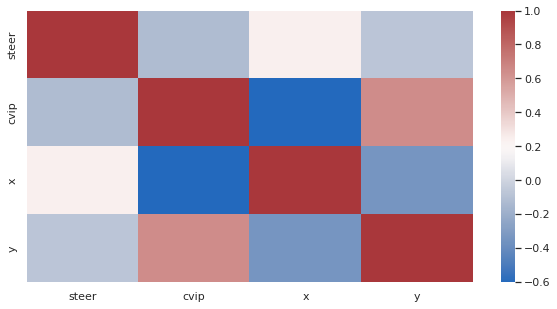

In [ ]:
sns.heatmap(indicators_df.corr(), cmap='vlag')

Since there is relatively strong correlation between x and cvip or y and cvip, we can simply use less fields to predict abnormal AV behaviour while keeping most of the predicting power while using all the features.


If we do not consider correlations between certain features (and remove some highly correlated ones), then these features may contribute much more during prediction than it should have.

## Task 2.5 Kolmogorov-Smirnov two-sample test 

$H_0$: the distribution of indicator values between in abnormal condition and that in normal condition are identical, so $F(x)=G(x)$ for all $x$ \\
$H_a$: the distribution of indicator values between in abnormal condition and that in normal condition are not identical $F(x)\neq G(x)$ (two-sided)


In [ ]:
def ks_2samp(feature, ctl=False, cvip=False, traj=False):
  if ctl:
    abnormal = pd.concat([clear_night_ctl[feature], rain_noon_ctl[feature]], axis=0)
    normal = pd.concat([clear_noon_ctl[feature], clear_sunset_ctl[feature]], axis=0)
  elif cvip:
    abnormal = pd.concat([clear_night_cvip[feature], rain_noon_cvip[feature]], axis=0)
    normal = pd.concat([clear_noon_cvip[feature], clear_sunset_cvip[feature]], axis=0)
  elif traj:
    abnormal = pd.concat([clear_night_traj[feature], rain_noon_traj[feature]], axis=0)
    normal = pd.concat([clear_noon_traj[feature], clear_sunset_traj[feature]], axis=0)
  return scipy.stats.ks_2samp(normal, abnormal)
ks_2samp('steer', ctl=True)

KstestResult(statistic=0.255447169023328, pvalue=3.216072714961863e-41)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the steering data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('cvip', cvip=True)

KstestResult(statistic=0.24501024203010957, pvalue=6.542134262242544e-38)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the cvip data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('x', traj=True)

KstestResult(statistic=0.5475548396078197, pvalue=1.0606363957036516e-199)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the x data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('y', traj=True)

KstestResult(statistic=0.1277708171747907, pvalue=1.5569290301442607e-10)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the y data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('throttle', ctl=True)

KstestResult(statistic=0.13137541515024959, pvalue=4.108169360250713e-11)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the throttle data for normal and abnormal conditions are different.

In [ ]:
ks_2samp('brake', ctl=True)

KstestResult(statistic=0.041483205059364, pvalue=0.16863859937978443)

Since our p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis and conclude that the probability distributions between the brake data for normal and abnormal conditions are equal.

In [ ]:
ks_2samp('v', traj=True)

KstestResult(statistic=0.31729610405107095, pvalue=7.068817815005532e-64)

Since our p-value is much less than the significance level of 0.05, we reject the null hypothesis and conclude that the probability distributions between the v data for normal and abnormal conditions are different.

The major difference between KS test and t-test is that t-test tests on whether the means of two distributions are equal or not, while KS-test catches difference of distance between two distributions, in both shape and mean. Two sample t-test may assume the distribution is approximately normal and variability of two distributions is similar. KS-tests does not assume similarity between two distributions. 
 

To conclude, KS test can find more types of discrepancy between two distributions than the t-test can.

## Task 2.6 Assumptions of KS two-sample test

In 2.4, we assume that all the features data are independent from when they were measured (i.e. values at each time point as an individual sample independent from each other). $v$, for example, could have its value at the current timestamp be dependent on its values previous timestamp(s). This is because the change of $v$ is determined by both current $v$ and acceleration. This assumption is shown to fail for both v and throttle, since they were intially not predicted to be indicator variables. Thus, suggesting that both v and throttle are dependent on time.

## Task 2.7 Dynamic-time-wrapper (DTW)

In [ ]:
!pip install git+https://github.com/wannesm/dtaidistance.git#egg=dtaidistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/wannesm/dtaidistance.git to /tmp/pip-install-is95v3no/dtaidistance_df1a5bdda25b44f4affb818f9a3b1858
  Running command git clone -q https://github.com/wannesm/dtaidistance.git /tmp/pip-install-is95v3no/dtaidistance_df1a5bdda25b44f4affb818f9a3b1858
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.9-cp37-cp37m-linux_x86_64.whl size=1647474 sha256=aca22f3744bac095512eb85304aff8362d8184b998a88ee638f7611fe2d9f552
  Stored in directory: /tmp/pip-ephem-wheel-cache-qjhmbybc/wheels/16/cd/f5/e860f3789ffaf8864047650a1c0f7ac88cd2c9f4a4acbc6b1e
Successfully built dtaidistance


In [ ]:
from dtaidistance import dtw

dtw1 = dtw.distance(clear_night_ctl['steer'], clear_noon_ctl['steer'])
dtw2 = dtw.distance(clear_sunset_ctl['steer'], clear_noon_ctl['steer'])
print('dtw of steering data between clear-noon and clear-night: ' + str(dtw1))
print('dtw of steering data between clear-sunset and clear-noon: ' + str(dtw2))

dtw of steering data between clear-noon and clear-night: 1.719544523494614
dtw of steering data between clear-sunset and clear-noon: 0.061802231504329126


Temporally, the steering data between clear-night and clear-noon are less similar than the steering data between clear-sunset and clear-noon.